## 余弦相似度和广义Jaccard相似度

已知向量(水果, 公司, 手机, 粮食)

R(苹果)=(0.96, 0.77, 0.85, 0.15)
R(大米)=(0.18, 0.22, 0.05, 0.93)

计算余弦相似度:

$$
\text{余弦相似度} = \frac{\sum_{i=1}^{n} A_i B_i}{\sqrt{\sum_{i=1}^{n} A_i^2} \cdot \sqrt{\sum_{i=1}^{n} B_i^2}}
$$

$$
\text{余弦相似度} = \frac{(0.96 \times 0.18) + (0.77 \times 0.22) + (0.85 \times 0.05) + (0.15 \times 0.93)}{\sqrt{(0.96^2 + 0.77^2 + 0.85^2 + 0.15^2)} \cdot \sqrt{(0.18^2 + 0.22^2 + 0.05^2 + 0.93^2)}}
$$

$$
\text{余弦相似度} = \frac{0.1728 + 0.1694 + 0.0425 + 0.1395}{\sqrt{0.9216 + 0.5929 + 0.7225 + 0.0225} \cdot \sqrt{0.0324 + 0.0484 + 0.0025 + 0.8649}}
$$

$$
\text{余弦相似度} = \frac{0.5242}{\sqrt{2.2595} \cdot \sqrt{0.9482}}
$$

$$
\text{余弦相似度} = \frac{0.5242}{1.5032 \cdot 0.9737}
$$

$$
\text{余弦相似度} \approx 0.358
$$

计算广义Jaccard相似度:

$$
\begin{align*}
\mathbf{A} \cdot \mathbf{B} &= (0.96 \times 0.18) + (0.77 \times 0.22) + (0.85 \times 0.05) + (0.15 \times 0.93) \\
&= 0.1728 + 0.1694 + 0.0425 + 0.1395 \\
&= 0.5242
\end{align*}
$$

$$
\begin{align*}
||\mathbf{A}||^2 &= 0.96^2 + 0.77^2 + 0.85^2 + 0.15^2 \\
&= 0.9216 + 0.5929 + 0.7225 + 0.0225 \\
&= 2.26
\end{align*}
$$

$$
\begin{align*}
||\mathbf{B}||^2 &= 0.18^2 + 0.22^2 + 0.05^2 + 0.93^2 \\
&= 0.0324 + 0.0484 + 0.0025 + 0.8649 \\
&= 0.9482
\end{align*}
$$

$$
\begin{align*}
\text{广义Jaccard系数} &= \frac{\mathbf{A} \cdot \mathbf{B}}{||\mathbf{A}||^2 + ||\mathbf{B}||^2 - \mathbf{A} \cdot \mathbf{B}} \\
&= \frac{0.5242}{2.26 + 0.9482 - 0.5242} \\
&= \frac{0.5242}{2.684} \\
&\approx 0.1953
\end{align*}
$$

## 词袋模型

In [1]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# 输入两个句子

sentences1 = "蒹葭苍苍，白露为霜。所谓伊人，在水一方。"
sentences2 = "蒹葭采采，白露未晞。所谓伊人，在水之湄。"

# 使用 jieba 库进行分词

import jieba

def jieba_cut(sentences: str) -> str:
    return " ".join(jieba.cut(sentences))

sentences1_cut = jieba_cut(sentences1)
sentences2_cut = jieba_cut(sentences2)

# 构建词袋模型

vectorizer = CountVectorizer()

# 将两个句子转换为词向量

X = vectorizer.fit_transform([sentences1_cut, sentences2_cut])

# 计算余弦相似度

cosine_sim = cosine_similarity(X[0:1], X[1:2])

# 输出相似度

print(f'两个句子的相似度为：{cosine_sim[0][0]:.4f}')

Building prefix dict from the default dictionary ...
Dumping model to file cache /tmp/jieba.cache
Loading model cost 0.430 seconds.
Prefix dict has been built successfully.


两个句子的相似度为：0.6000


## 词袋模型(更多句子)

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import jieba

# 使用 jieba 库进行分词
def jieba_cut(sentences: str) -> str:
    return " ".join(jieba.cut(sentences))

# 输入多个句子
sentences = [
    "蒹葭苍苍，白露为霜。所谓伊人，在水一方。溯洄从之，道阻且长。溯游从之，宛在水中央。", 
    "蒹葭萋萋，白露未晞。所谓伊人，在水之湄。溯洄从之，道阻且跻。溯游从之，宛在水中坻。",
    "蒹葭采采，白露未已。所谓伊人，在水之涘。溯洄从之，道阻且右。溯游从之，宛在水中沚。"
]

# 对每个句子进行分词
sentences_cut = [jieba_cut(sentence) for sentence in sentences]

# 构建词袋模型
vectorizer = CountVectorizer()

# 将句子转换为词向量
X = vectorizer.fit_transform(sentences_cut)

# 计算余弦相似度矩阵
cosine_sim_matrix = cosine_similarity(X)

# 输出相似度矩阵
print("句子之间的相似度矩阵为：")
print(cosine_sim_matrix)

句子之间的相似度矩阵为：
[[1.    0.625 0.625]
 [0.625 1.    0.875]
 [0.625 0.875 1.   ]]


## 使用Word2Vec计算文本相似度

In [1]:
import jieba
from gensim.models import Word2Vec
from sklearn.metrics.pairwise import cosine_similarity

# 构造句子
sentences = [
    "我喜欢在清晨喝一杯热茶，享受安静的时光。",
    "今天是我生日，我准备和家人一起庆祝。",
    "科技改变了我们的生活，尤其是人工智能的发展。",
    "早晨的阳光洒在大地上，给一切带来了温暖。",
    "我喜欢在每天下午来一杯咖啡，它能让我更加集中精神。",
    "每当下雨时，我喜欢在窗前静静地看着雨滴落下。",
    "昨晚我和朋友一起去看了一场电影，感觉很放松。",
    "电脑和手机已经成为现代社会不可或缺的一部分。",
    "他每天都在健身房锻炼，已经养成了好习惯。",
    "今天是我的生日，但我与朋友约好了一起在海底捞庆祝。",
    "我喜欢读科幻小说，因为它们带我进入了另一个未知的世界。"
]

# 使用 jieba 库进行分词
def cut_sentences(sentences: list) -> list:
    return [list(jieba.cut(sentence)) for sentence in sentences]

tokenized_sentences = cut_sentences(sentences)

# 打印分词结果

for i, tokenized_sentence in enumerate(tokenized_sentences):
    print(f'句子 {i + 1} 的分词结果为：{tokenized_sentence}')


Building prefix dict from the default dictionary ...
Loading model from cache /tmp/jieba.cache
Loading model cost 0.531 seconds.
Prefix dict has been built successfully.


句子 1 的分词结果为：['我', '喜欢', '在', '清晨', '喝一杯', '热茶', '，', '享受', '安静', '的', '时光', '。']
句子 2 的分词结果为：['今天', '是', '我', '生日', '，', '我', '准备', '和', '家人', '一起', '庆祝', '。']
句子 3 的分词结果为：['科技', '改变', '了', '我们', '的', '生活', '，', '尤其', '是', '人工智能', '的', '发展', '。']
句子 4 的分词结果为：['早晨', '的', '阳光', '洒', '在', '大', '地上', '，', '给', '一切', '带来', '了', '温暖', '。']
句子 5 的分词结果为：['我', '喜欢', '在', '每天', '下午', '来', '一杯', '咖啡', '，', '它', '能', '让', '我', '更加', '集中', '精神', '。']
句子 6 的分词结果为：['每当', '下雨', '时', '，', '我', '喜欢', '在', '窗前', '静静地', '看着', '雨滴', '落下', '。']
句子 7 的分词结果为：['昨晚', '我', '和', '朋友', '一起', '去', '看', '了', '一场', '电影', '，', '感觉', '很', '放松', '。']
句子 8 的分词结果为：['电脑', '和', '手机', '已经', '成为', '现代', '社会', '不可或缺', '的', '一部分', '。']
句子 9 的分词结果为：['他', '每天', '都', '在', '健身房', '锻炼', '，', '已经', '养成', '了', '好', '习惯', '。']
句子 10 的分词结果为：['今天', '是', '我', '的', '生日', '，', '但', '我', '与', '朋友', '约', '好', '了', '一起', '在', '海底', '捞', '庆祝', '。']
句子 11 的分词结果为：['我', '喜欢', '读', '科幻小说', '，', '因为', '它们', '带', '我', '进入', '了', '另', '一个', '未知', '的',

In [2]:
# 模型训练
model = Word2Vec(tokenized_sentences, vector_size=100, window=5, min_count=1, sg=0)

# 计算词向量平均值

import numpy as np
def sentence_vector(sentence: list, model: Word2Vec) -> np.ndarray:
    return np.mean([model.wv[word] for word in sentence if word in model.wv], axis=0)

# 获取每个句子的词向量平均值
sentence_vectors = [sentence_vector(tokenized_sentence, model) for tokenized_sentence in tokenized_sentences]

# 计算余弦相似度
cosine_sim_matrix = cosine_similarity(sentence_vectors)
print("句子之间的相似度矩阵为：")
print(cosine_sim_matrix)

句子之间的相似度矩阵为：
[[1.0000001  0.21406382 0.3656558  0.32999903 0.37579834 0.35243154
  0.23178878 0.26200604 0.24797931 0.33921558 0.45721835]
 [0.21406382 1.0000001  0.13763185 0.14183322 0.42080408 0.23187882
  0.4723096  0.18504092 0.196365   0.6692903  0.37709385]
 [0.3656558  0.13763185 1.0000002  0.3956257  0.11841707 0.20256
  0.08641222 0.1866473  0.07638919 0.2698694  0.32347167]
 [0.32999903 0.14183322 0.3956257  0.9999999  0.30454898 0.3470392
  0.3411435  0.14398666 0.2660911  0.38223583 0.35529616]
 [0.37579834 0.42080408 0.11841707 0.30454898 0.99999994 0.3340966
  0.39148438 0.05240537 0.3618695  0.4679495  0.47891426]
 [0.35243154 0.23187882 0.20256    0.3470392  0.3340966  1.0000001
  0.36171657 0.05090616 0.34389955 0.34258953 0.38084632]
 [0.23178878 0.4723096  0.08641222 0.3411435  0.39148438 0.36171657
  1.0000002  0.16992868 0.32623962 0.5365766  0.4465244 ]
 [0.26200604 0.18504092 0.1866473  0.14398666 0.05240537 0.05090616
  0.16992868 1.0000001  0.20117782 0.300632

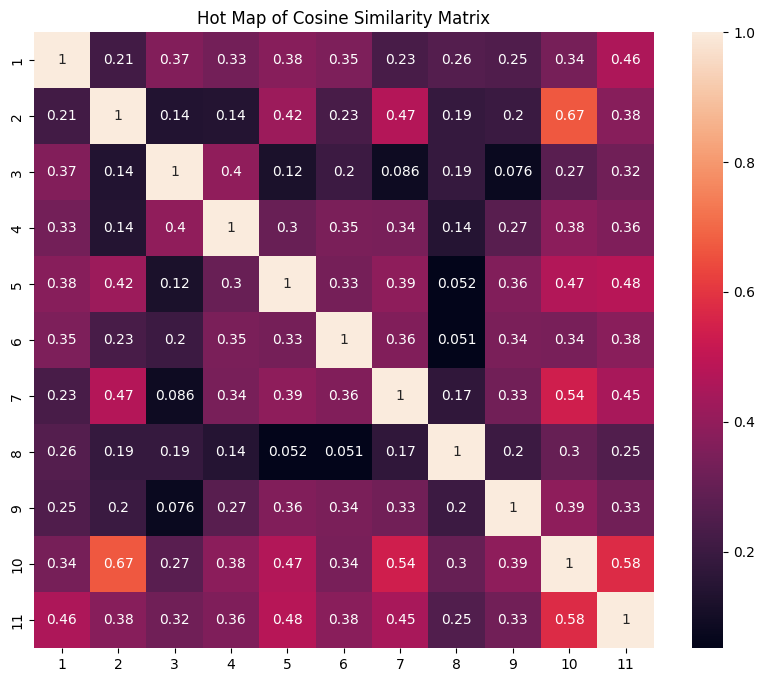

In [3]:
# 使用热图可视化结果

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
sns.heatmap(cosine_sim_matrix, annot=True, xticklabels=range(1, 12), yticklabels=range(1, 12))
plt.title("Hot Map of Cosine Similarity Matrix")
plt.show()

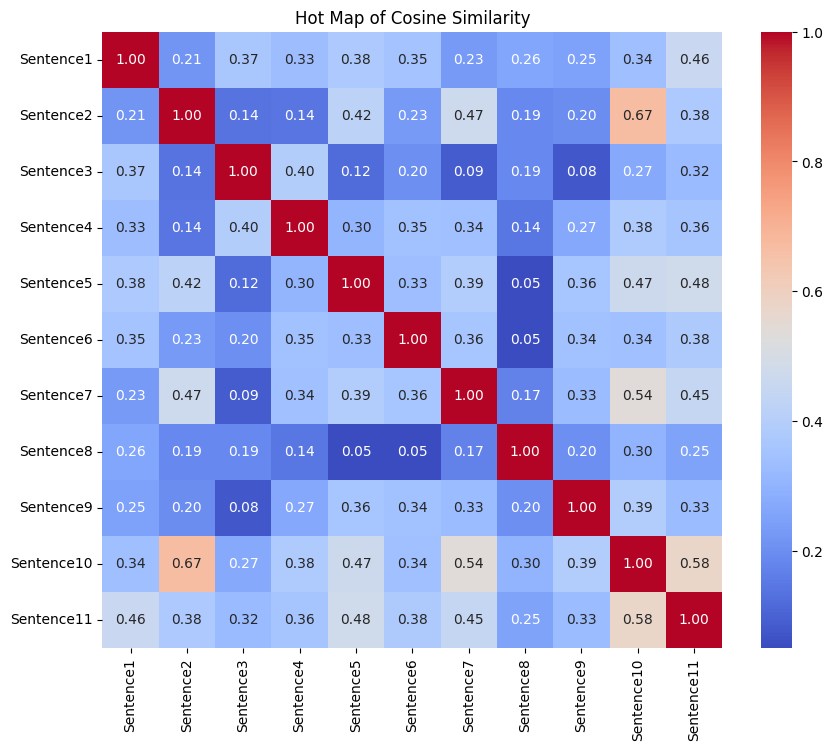

In [5]:
# 使用热图可视化结果

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))

sns.heatmap(cosine_sim_matrix, 
            annot=True, 
            cmap="coolwarm", 
            xticklabels=[f"Sentence{i+1}" for i in range(len(sentences))], yticklabels=[f"Sentence{i+1}" for i in range(len(sentences))], fmt=".2f")

plt.title("Hot Map of Cosine Similarity")
plt.show()